In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [11]:
df_main= pd.read_csv('spotify_data.csv')

In [12]:
df=df_main.copy()

In [13]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
artist_name,15
track_name,1
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0


In [16]:
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")


Total duplicate rows: 0


In [17]:
print(df.shape)
print(df.columns)

(1159764, 20)
Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


In [18]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [19]:
print(df.isnull().sum())


Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64


#### Unique values for object (categorical) columns

In [20]:
for col in  (df.select_dtypes(include=['object']).columns):
    print(f"\n🔸 {col} value counts:")
    print(df[col].value_counts())


🔸 artist_name value counts:
artist_name
Traditional                       4058
Grateful Dead                     2320
Johann Sebastian Bach             2125
Giacomo Meyerbeer                 1345
Elvis Presley                     1242
                                  ... 
Micke MiMo Moberg                    1
Surviving The Charade                1
Little Majorette                     1
Sonic Station                        1
Ohlson har semester production       1
Name: count, Length: 64158, dtype: int64

🔸 track_name value counts:
track_name
Intro                              466
Home                               313
Forever                            229
Hold On                            224
Stay                               220
                                  ... 
Ultra Love                           1
Sweet Dream - Steve Brian Remix      1
Electric Pirates                     1
Is It Love - Matt Lange Remix        1
Hear It Now                          1
Name: count, Length: 

#### Top 20 Genres

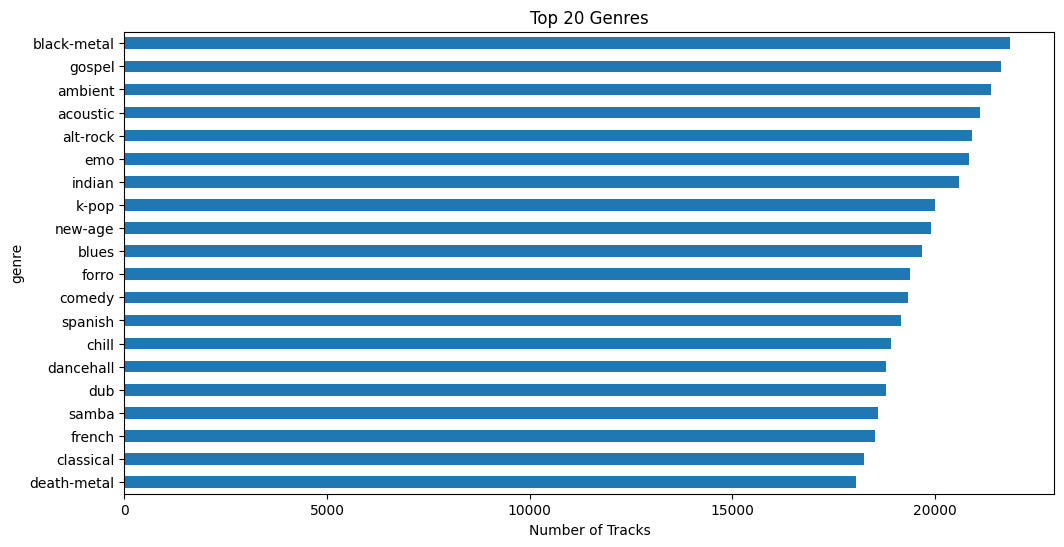

In [21]:
plt.figure(figsize=(12,6))
df['genre'].value_counts().head(20).plot(kind='barh')
plt.title("Top 20 Genres")
plt.xlabel("Number of Tracks")
plt.gca().invert_yaxis()
plt.show()


#### Popularity by Genre


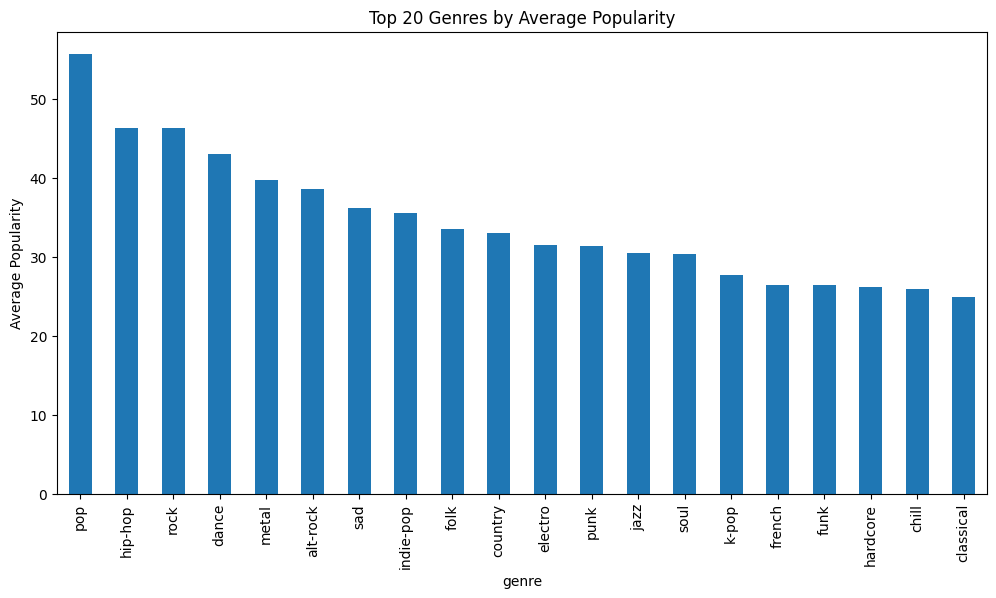

In [22]:
popularity_by_genre = df.groupby("genre")['popularity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
popularity_by_genre.plot(kind='bar')
plt.title("Top 20 Genres by Average Popularity")
plt.ylabel("Average Popularity")
plt.xticks(rotation=90)
plt.show()


#### Correlation Heatmap

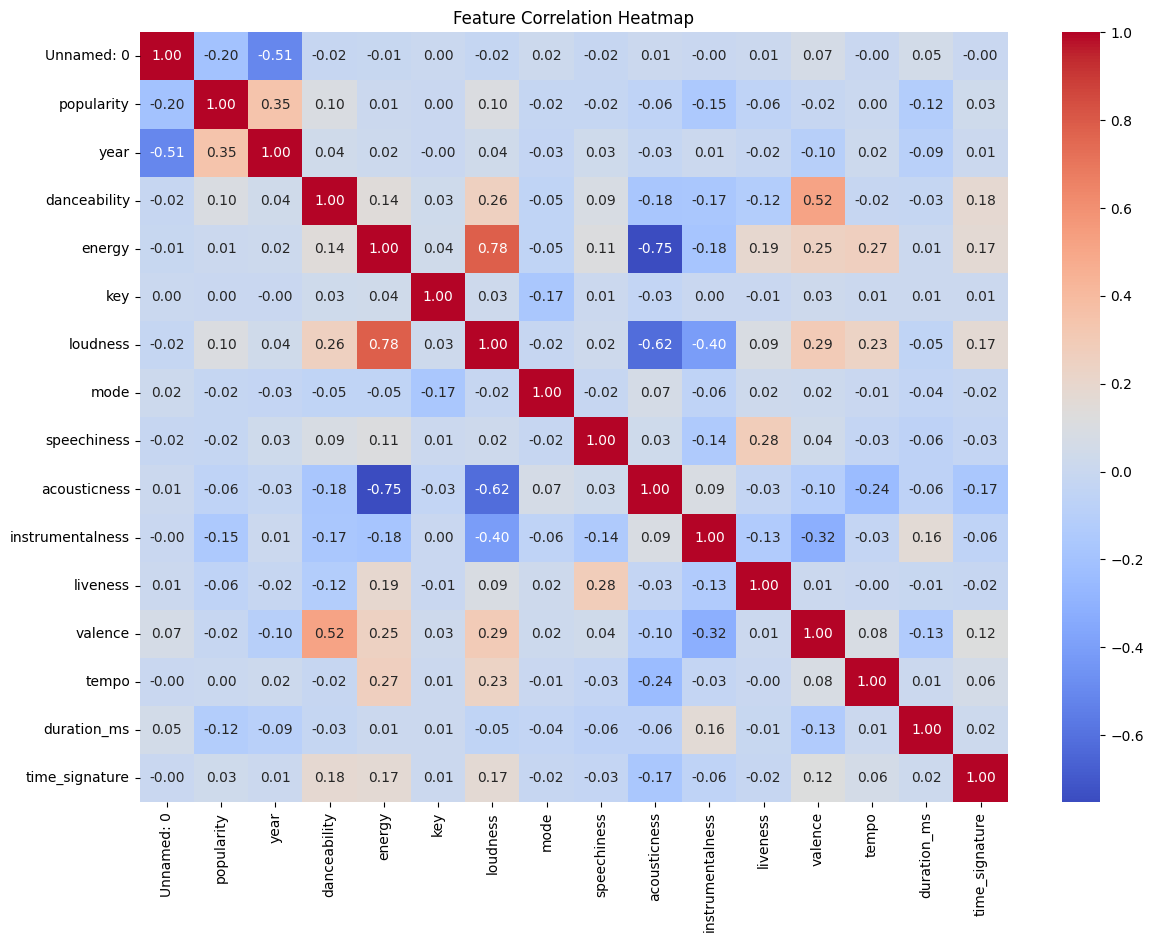

In [23]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


#### Distribution of Key Audio Features

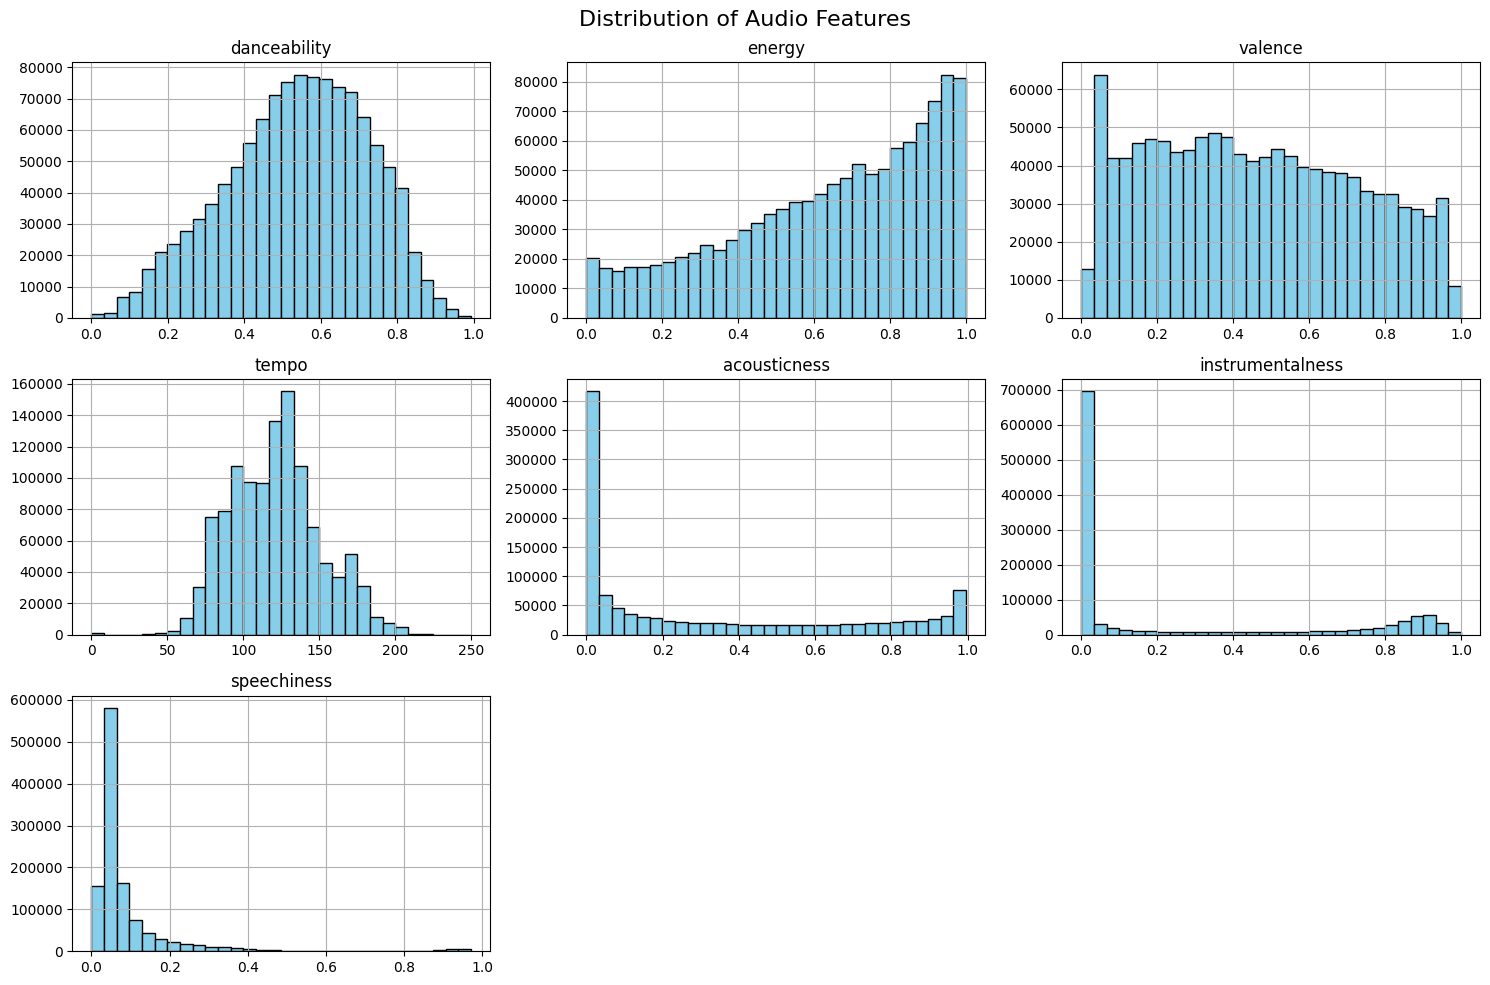

                      count        mean        std  min        25%        50%  \
danceability      1159764.0    0.537438   0.184478  0.0   0.413000    0.55000   
energy            1159764.0    0.639670   0.270501  0.0   0.454000    0.69400   
valence           1159764.0    0.455564   0.268519  0.0   0.226000    0.43800   
tempo             1159764.0  121.377137  29.779749  0.0  98.797000  121.93100   
acousticness      1159764.0    0.321537   0.354987  0.0   0.006400    0.14700   
instrumentalness  1159764.0    0.252349   0.365073  0.0   0.000001    0.00176   
speechiness       1159764.0    0.092815   0.126841  0.0   0.037100    0.05070   

                      75%      max  
danceability        0.677    0.993  
energy              0.873    1.000  
valence             0.674    1.000  
tempo             139.903  249.993  
acousticness        0.640    0.996  
instrumentalness    0.614    1.000  
speechiness         0.089    0.971  


In [24]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']

df[features].hist(figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.tight_layout()
plt.show()



print(df[features].describe().T)

####  Scatterplot: Danceability vs Popularity

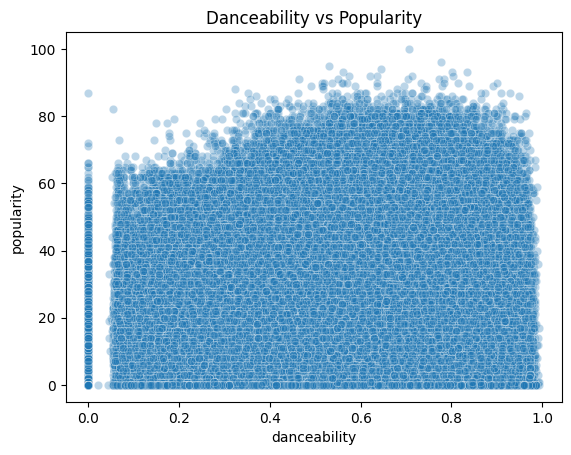

In [25]:
sns.scatterplot(data=df,x='danceability', y='popularity',alpha=0.3)
plt.title("Danceability vs Popularity")
plt.show()

#### Popularity Over Years

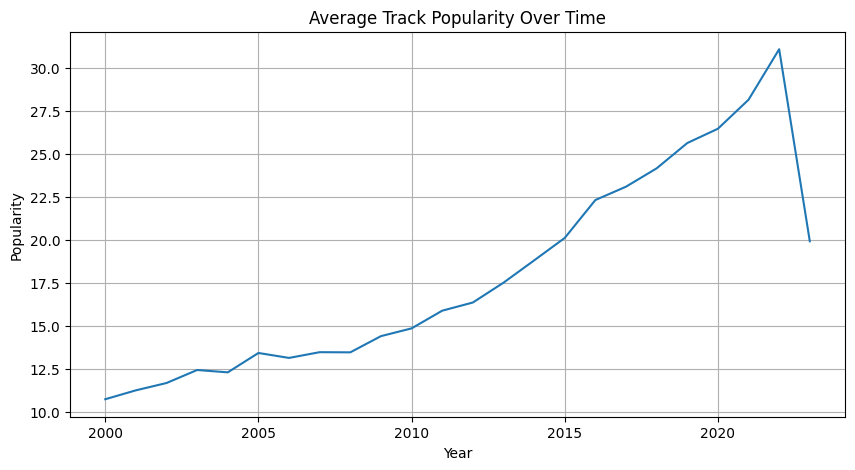

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby('year')['popularity'].mean().reset_index(), x='year', y='popularity')
plt.title("Average Track Popularity Over Time")
plt.ylabel("Popularity")
plt.xlabel("Year")
plt.grid(True)
plt.show()


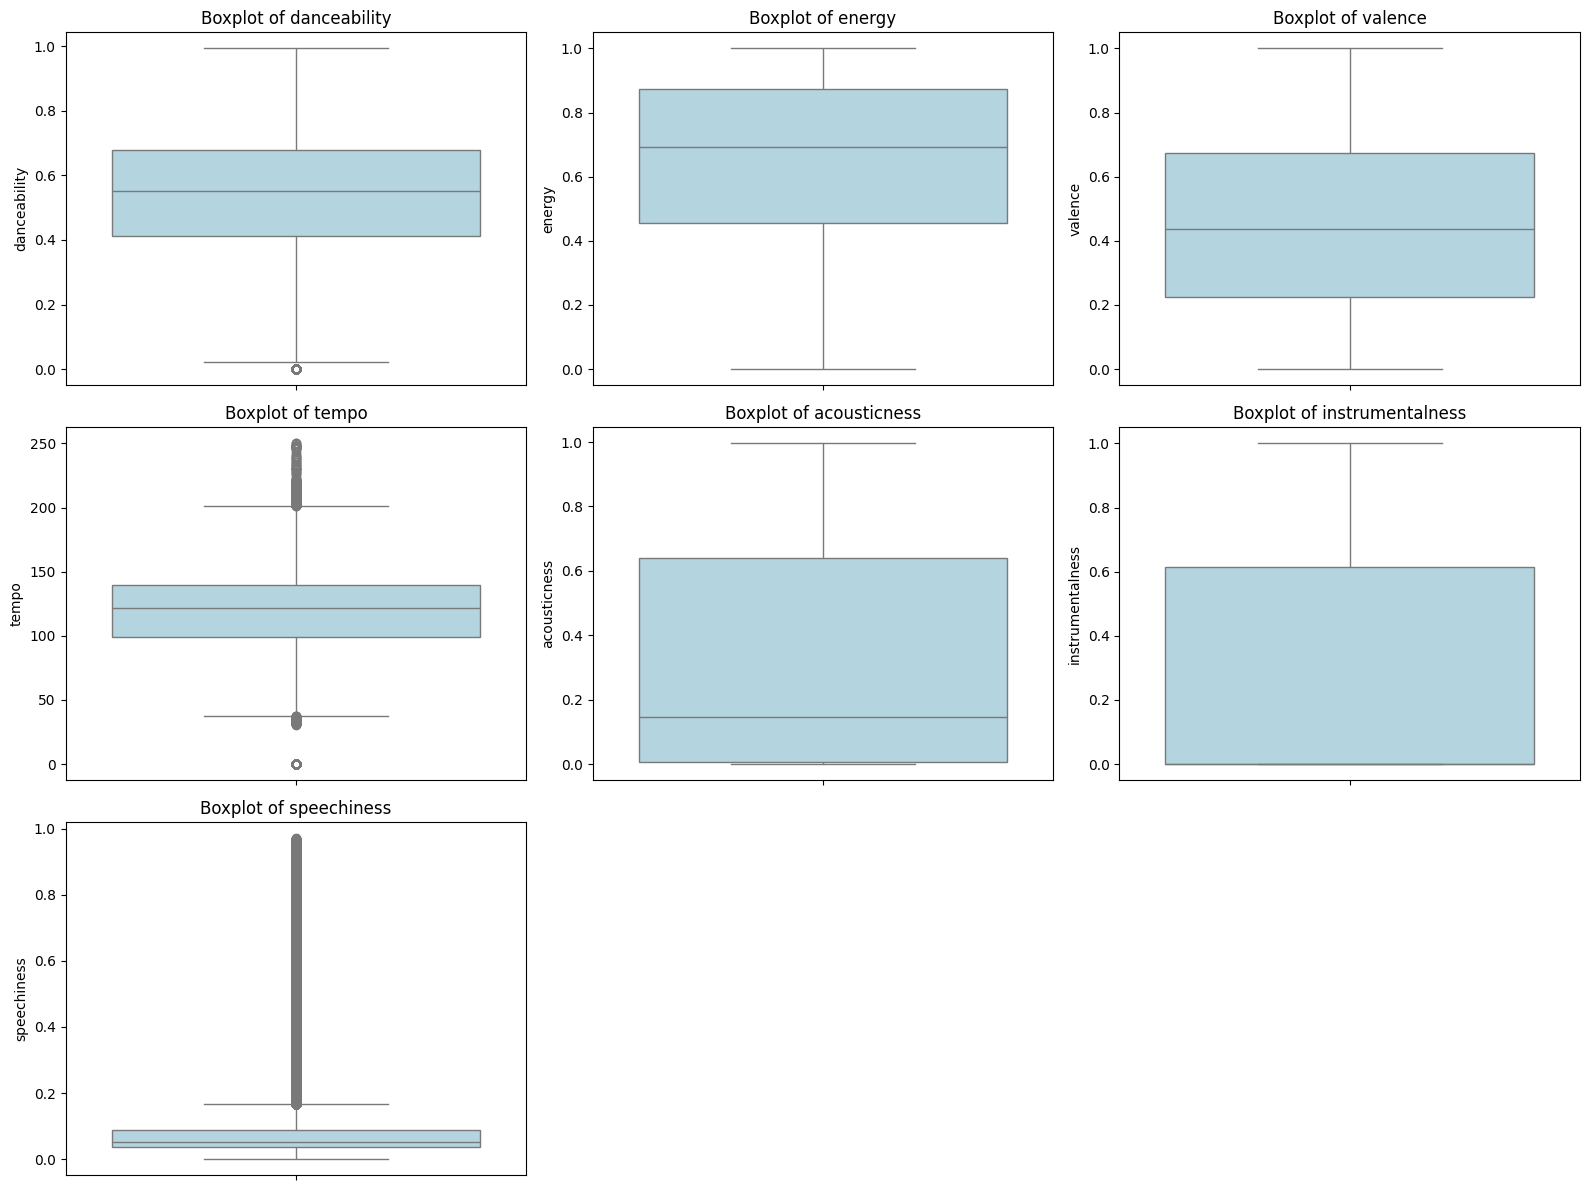

In [27]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}', fontsize=12)
    plt.tight_layout()
plt.show()


#### Drop remaining missing values (or use fillna if preferred)

In [28]:
df.dropna(inplace=True)

In [29]:
correlation = df[['popularity'] + features].corr()
pop_corr = correlation['popularity'].drop('popularity')

print("📊 Popularity Correlation:\n")
print(pop_corr.sort_values(ascending=False))


📊 Popularity Correlation:

danceability        0.098538
energy              0.009405
tempo               0.002567
valence            -0.018068
speechiness        -0.024700
acousticness       -0.059181
instrumentalness   -0.152899
Name: popularity, dtype: float64


In [30]:
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']

X = df[features].copy()

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


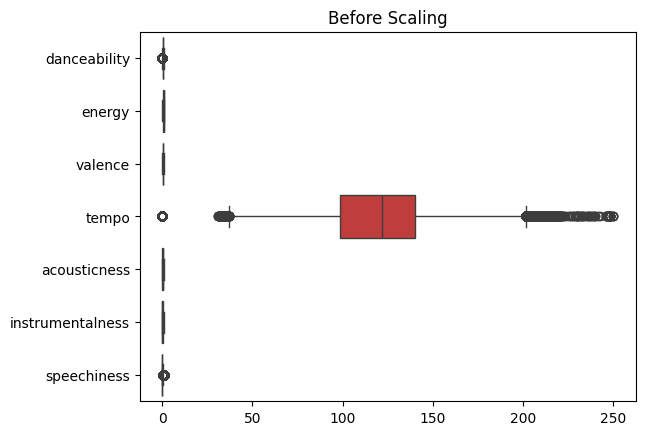

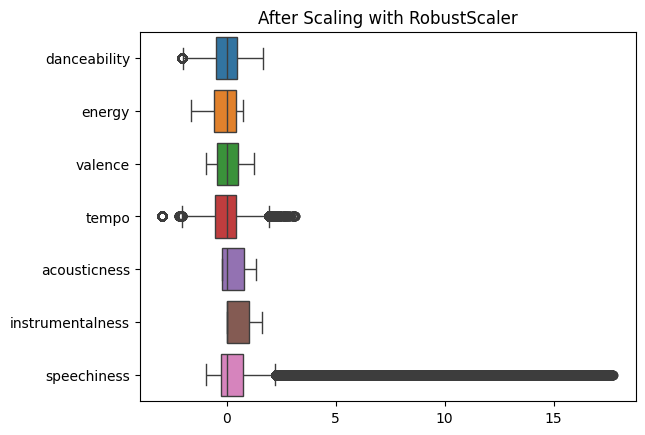

In [31]:
# Before scaling
sns.boxplot(data=X, orient='h')
plt.title("Before Scaling")
plt.show()

# After scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
sns.boxplot(data=X_scaled_df, orient='h')
plt.title("After Scaling with RobustScaler")
plt.show()


In [32]:
inertia = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [33]:
inertia

[9776136.909565631,
 5255492.164432714,
 3577730.2608018764,
 2892451.1148614013,
 2540257.8457463877,
 2251958.3658453715,
 2137697.291346914,
 1997289.219203144,
 1831113.0189163687,
 1739527.0851720837,
 1646123.8297499013,
 1582487.3968043772,
 1534782.5982918865,
 1490784.9934316587,
 1433466.7209054127,
 1398035.0788803126,
 1358279.470227121,
 1327355.2106785164,
 1294741.7395866136]

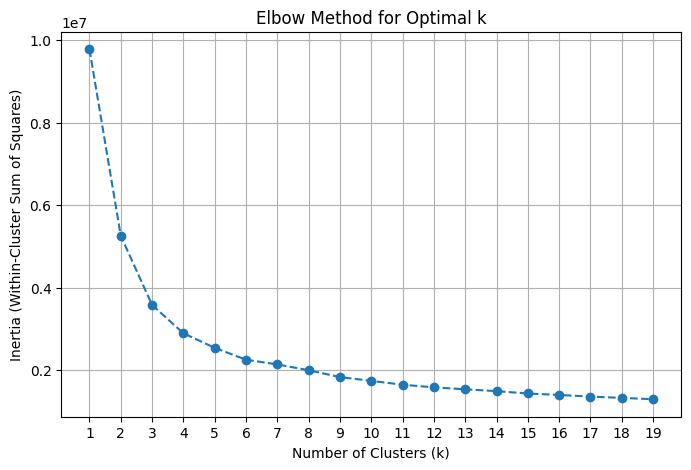

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [35]:
!pip install kneed


In [36]:
from kneed import KneeLocator

k_range = range(1, 20)
inertias = [
 7611261.45, 4110898.27, 2794390.88, 2259437.78, 1986508.20,
 1758834.03, 1641844.62, 1531258.67, 1428534.10, 1355595.25,
 1309774.49, 1242527.39, 1198691.11, 1161432.27, 1119929.16,
 1089544.12, 1060834.82, 1035393.39, 1002865.18
]

knee = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
print("Optimal number of clusters:", knee.knee)


Optimal number of clusters: 4


In [37]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [38]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

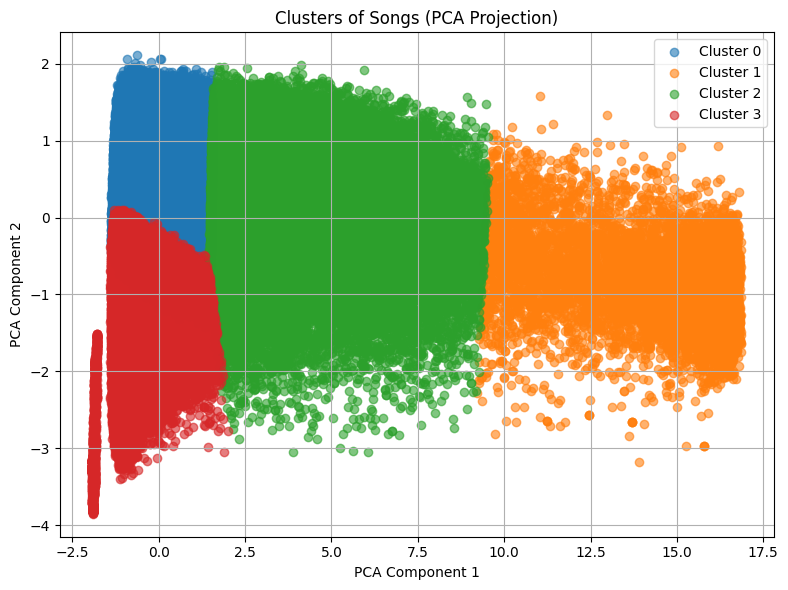

In [39]:
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {i}', alpha=0.6)

plt.title("Clusters of Songs (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('clusters.png')
plt.show()

In [40]:
import joblib

# Save KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save Scaler
joblib.dump(scaler, 'scaler.pkl')

# Save PCA
joblib.dump(pca, 'pca.pkl')


['pca.pkl']